Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('solarpowergeneration.csv')

##**EDA**

In [4]:
df.head(5)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
df.shape

(2920, 10)

In [7]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


###**`CHECKING FOR NULL VALUES`**

In [8]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

▶ THERE IS ONE NULL VALUE,WE Have FILLed  THE NULL VALUE WITH MEDIAN

###**IMPUTING NULL VALUES**

In [9]:
df['average-wind-speed-(period)']=df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].median())

In [10]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

###**CHECKING FOR DUPLICATES**

In [11]:
df[df.duplicated(keep=False)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated


there are no duplicates


###**CHECKING FOR OUTLIERS**

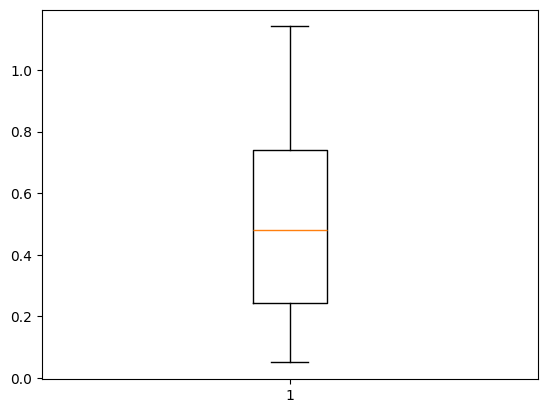

In [12]:
plt.boxplot(df["distance-to-solar-noon"])
plt.show()

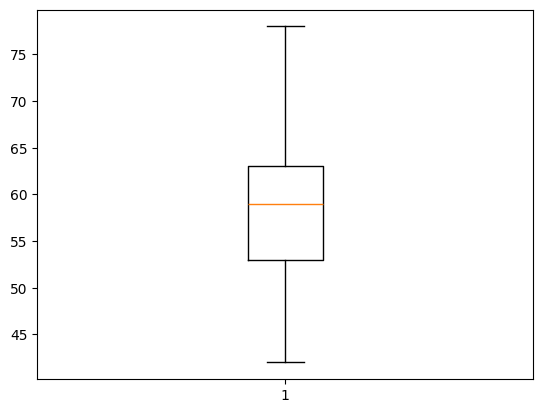

In [13]:
plt.boxplot(df["temperature"])
plt.show()

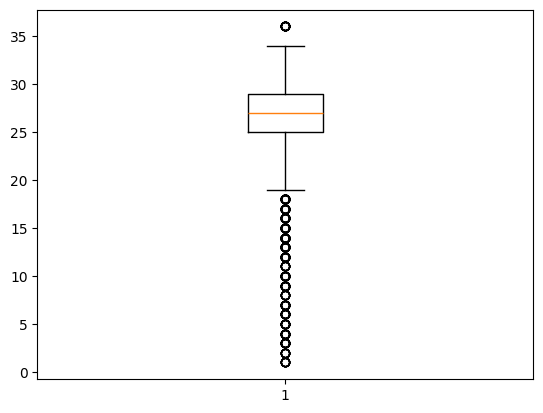

In [14]:
plt.boxplot(df['wind-direction'])
plt.show()

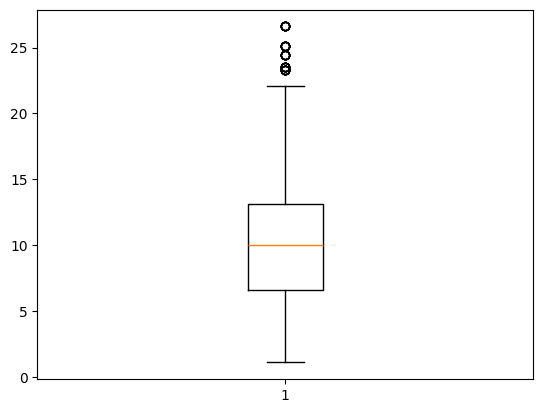

In [15]:
plt.boxplot(df['wind-speed'])
plt.show()

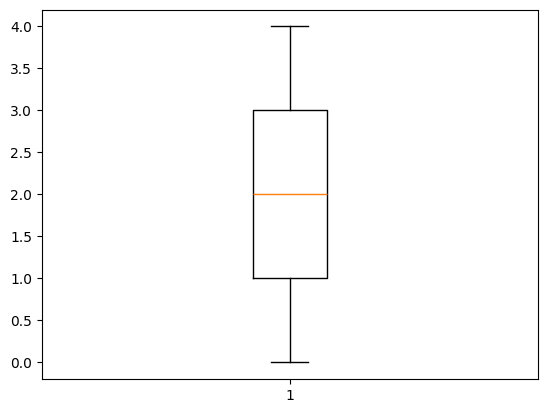

In [16]:
plt.boxplot(df['sky-cover'])
plt.show()

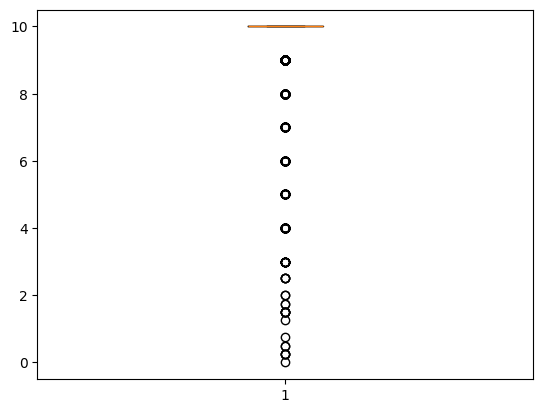

In [17]:
plt.boxplot(df['visibility'])
plt.show()

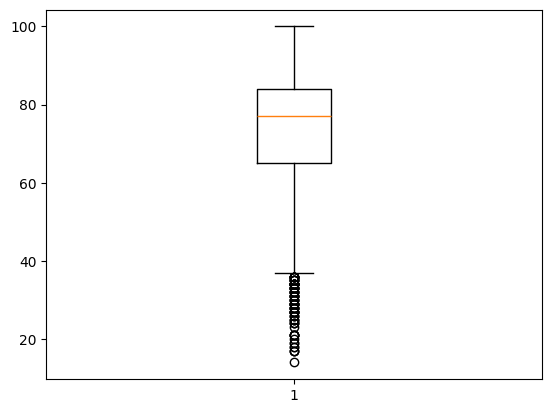

In [18]:
plt.boxplot(df['humidity'])
plt.show()

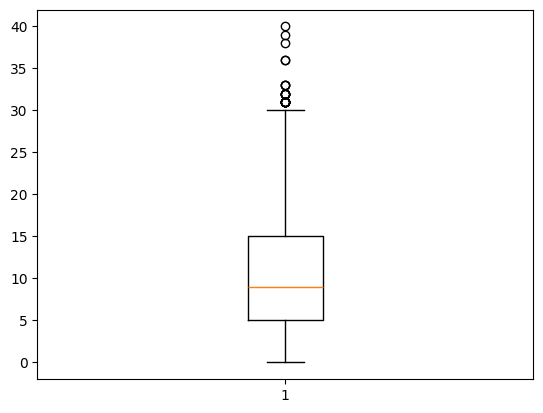

In [19]:
plt.boxplot(df['average-wind-speed-(period)'])
plt.show()

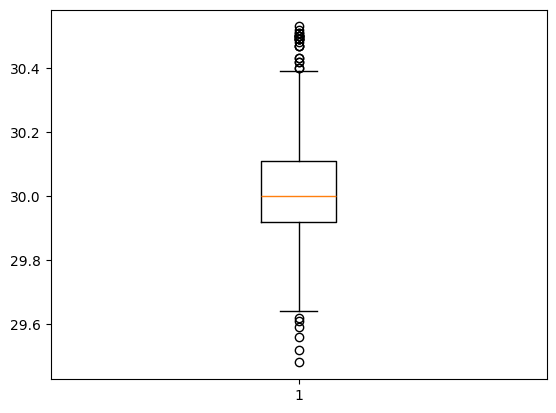

In [20]:
plt.boxplot(df['average-pressure-(period)'])
plt.show()

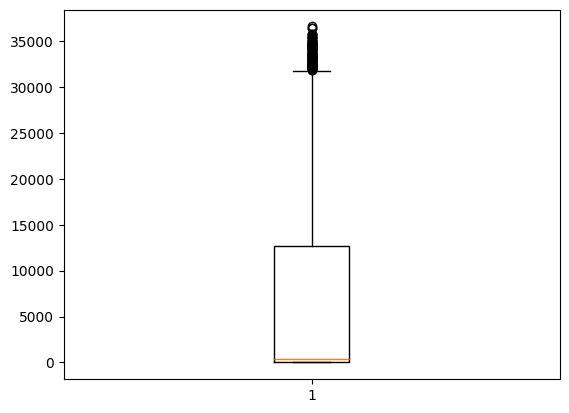

In [21]:
plt.boxplot(df['power-generated'])
plt.show()

the visibility column has mostly one single value so we are dropping it  

In [22]:
df.drop(['visibility'],axis=1,inplace=True)

In [23]:
df.head(5)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,21,3.0,29.89,30069


In [24]:
df['sky-cover'].value_counts()

sky-cover
1    776
4    598
3    580
0    518
2    448
Name: count, dtype: int64

###**TREATING OUTLIERS**

In [25]:
def outlier_detection(data,columns): # outlier detection function
    for col in columns:
        Q1 =data[col].quantile(0.25)
        Q3 =data[col].quantile(0.75)
        iqr = Q3-Q1
        upper = Q3+1.5*iqr
        lower = Q1-1.5*iqr
        data[col] = np.clip(data[col],upper,lower)
    return data

In [26]:
datacolumns = df.columns

In [27]:
df=outlier_detection(df,datacolumns)


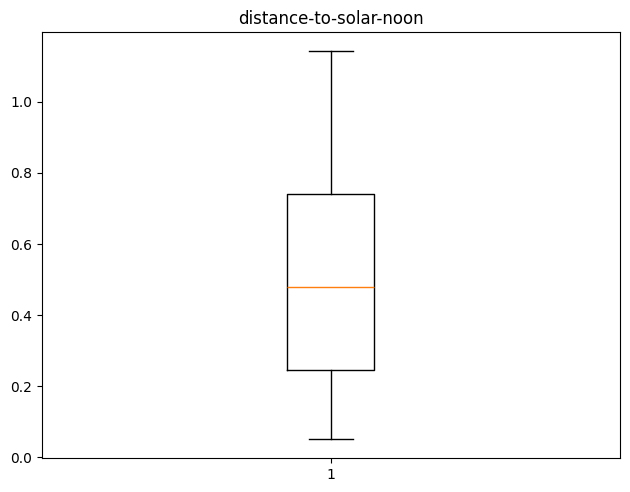

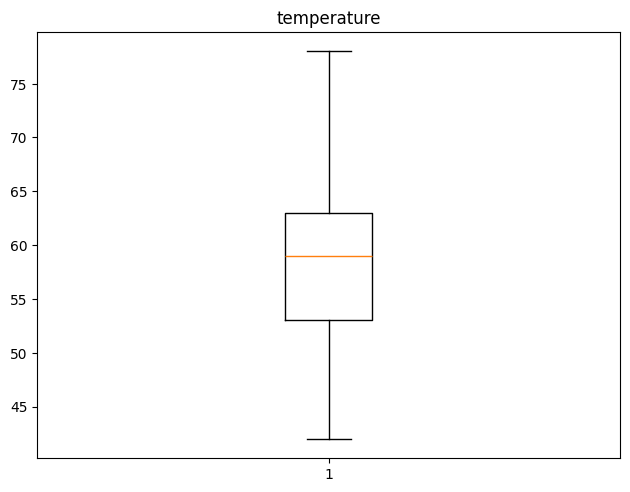

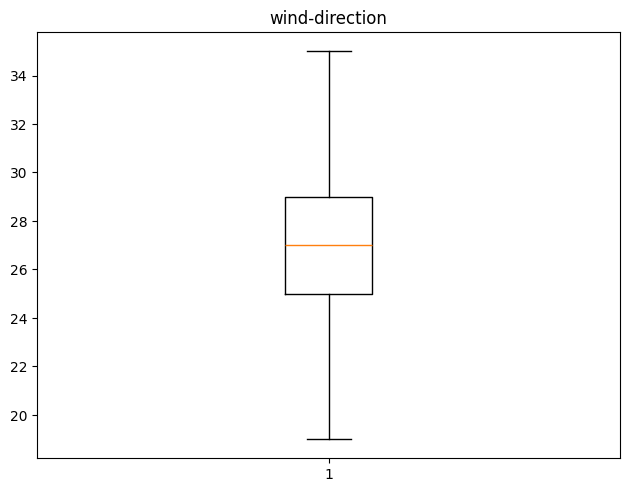

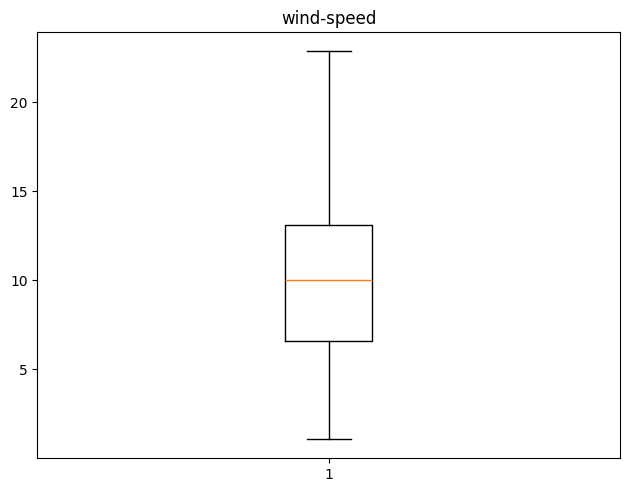

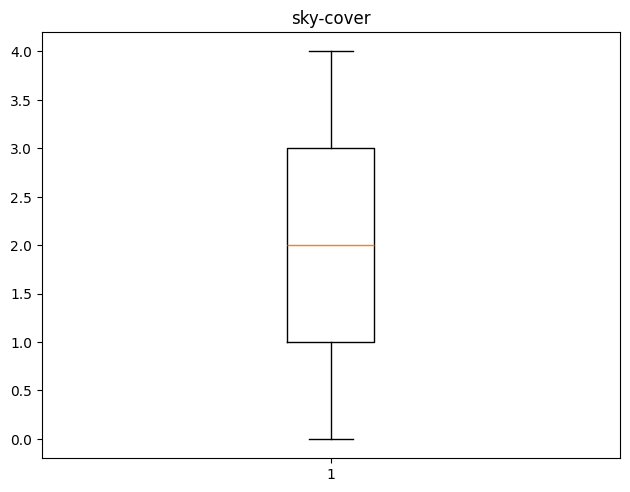

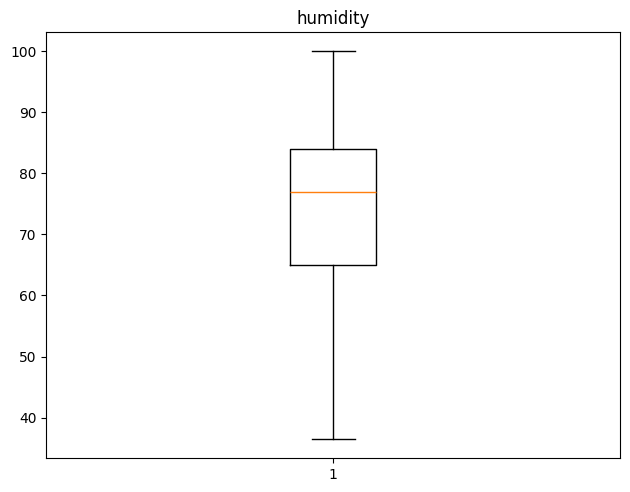

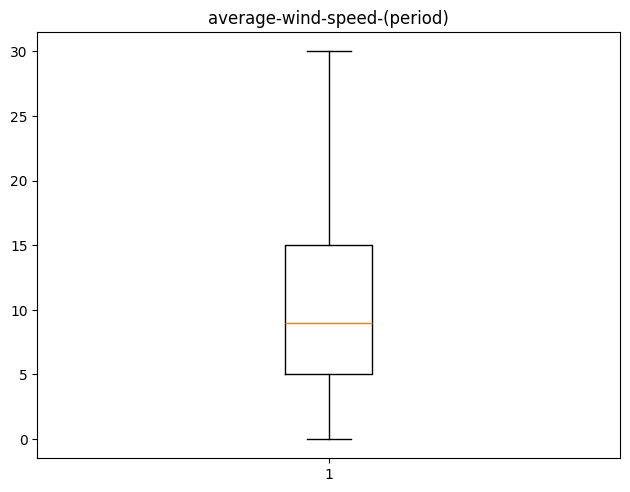

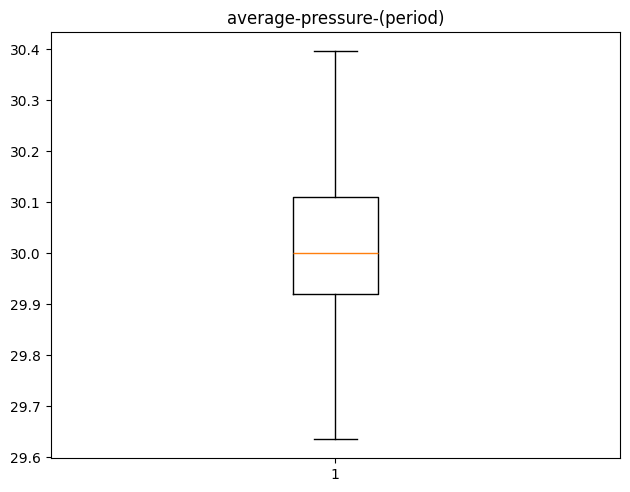

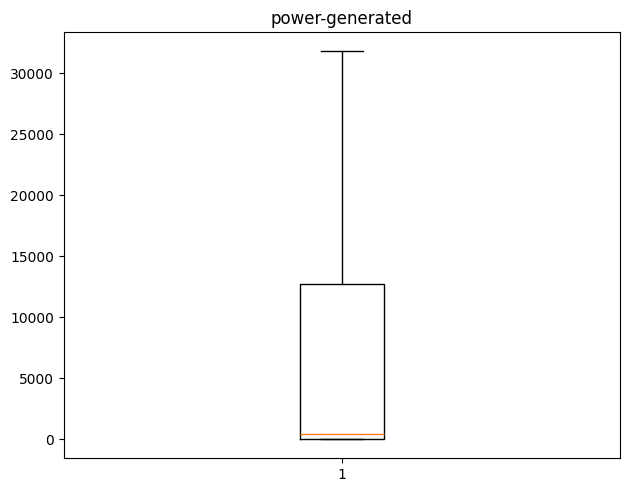

In [28]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col)
    plt.show()

In [29]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.503294,58.468493,26.254795,10.073288,1.987671,73.733390,10.104452,30.017211,6909.688099
std,0.298024,6.841200,4.089209,4.768867,1.411978,14.435966,7.184381,0.139437,10132.725158
min,0.050401,42.000000,19.000000,1.100000,0.000000,36.500000,0.000000,29.635000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,35.000000,22.850000,4.000000,100.000000,30.000000,30.395000,31808.750000


there are 1320 rows of '0' power generation which is an error so we are filling it with mean

### **Check data distribution after outlier treatment**

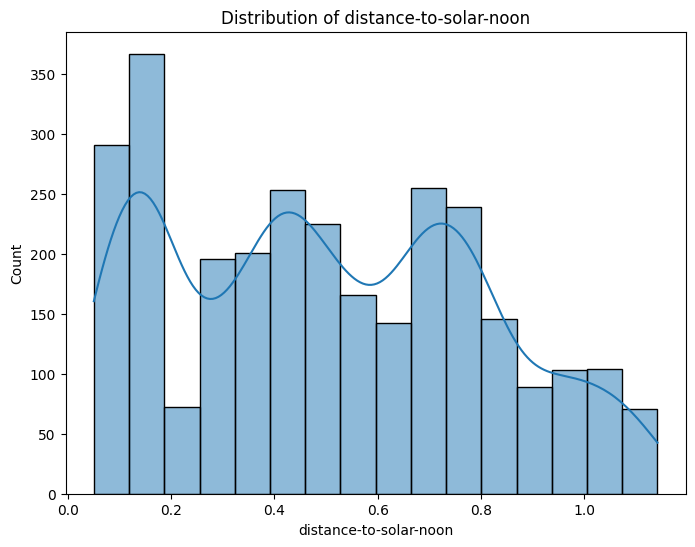

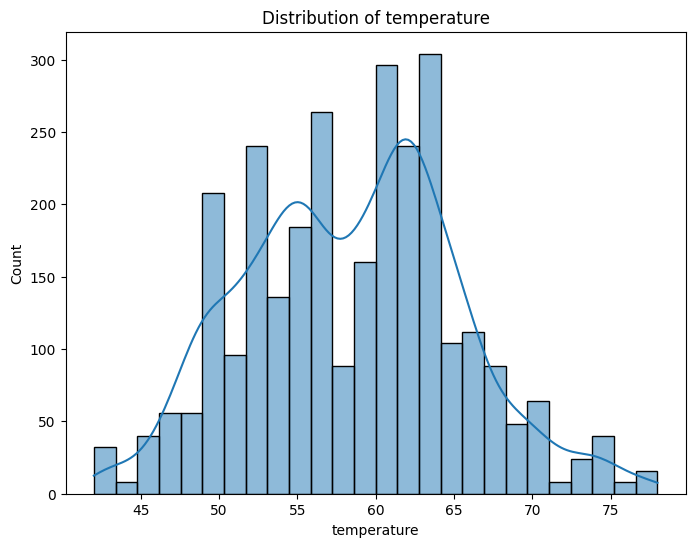

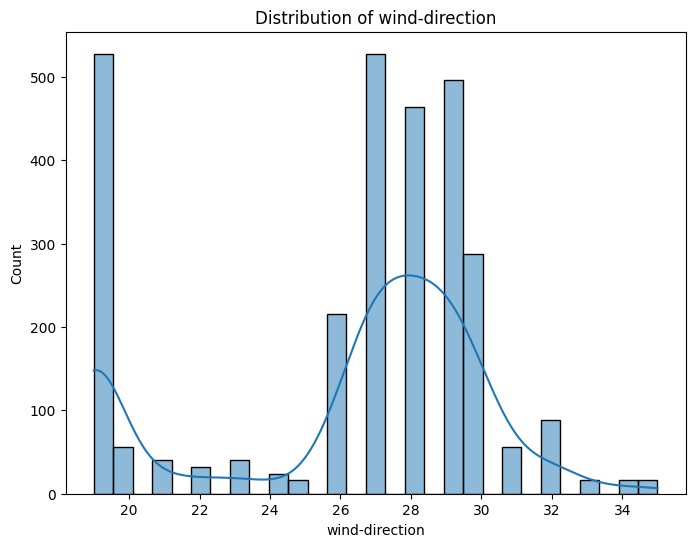

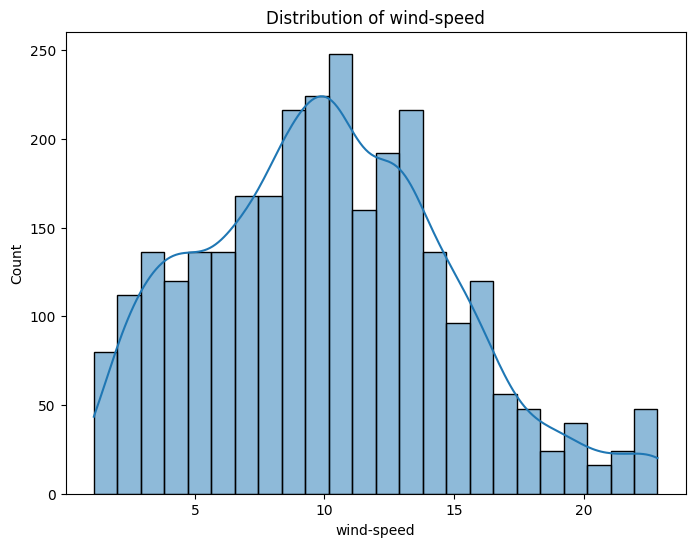

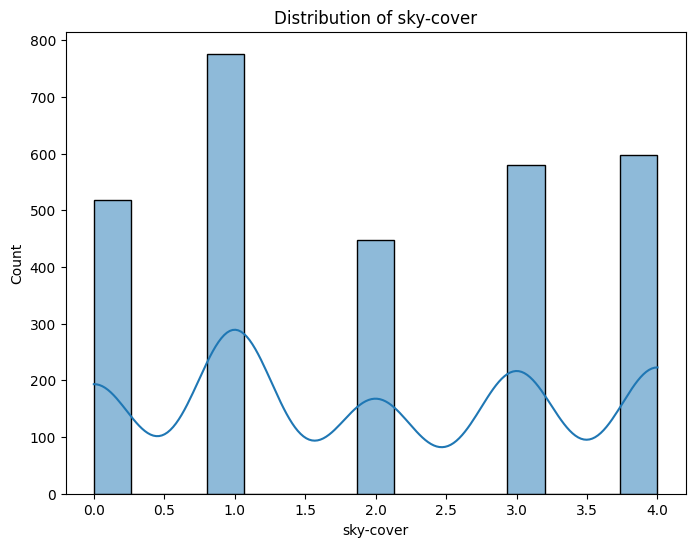

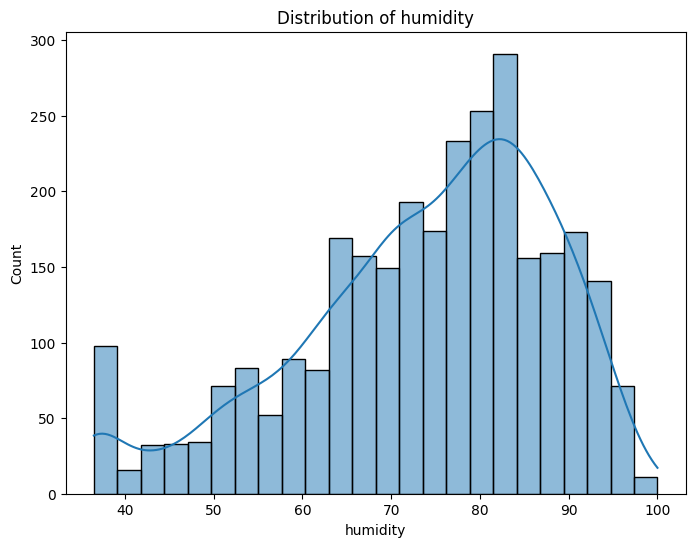

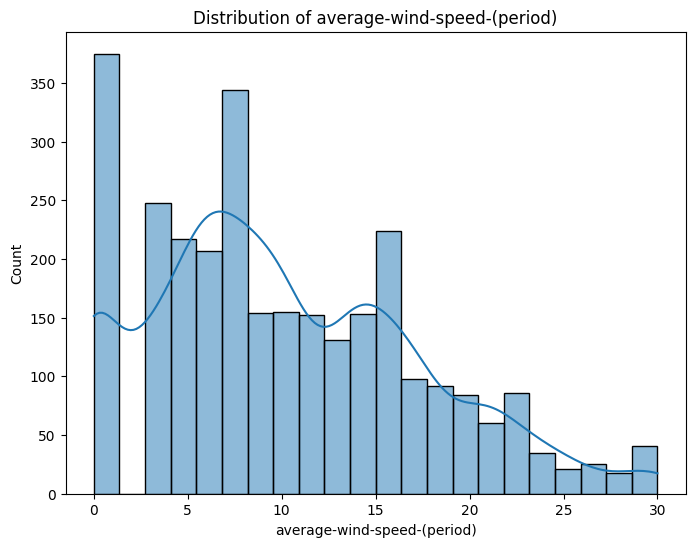

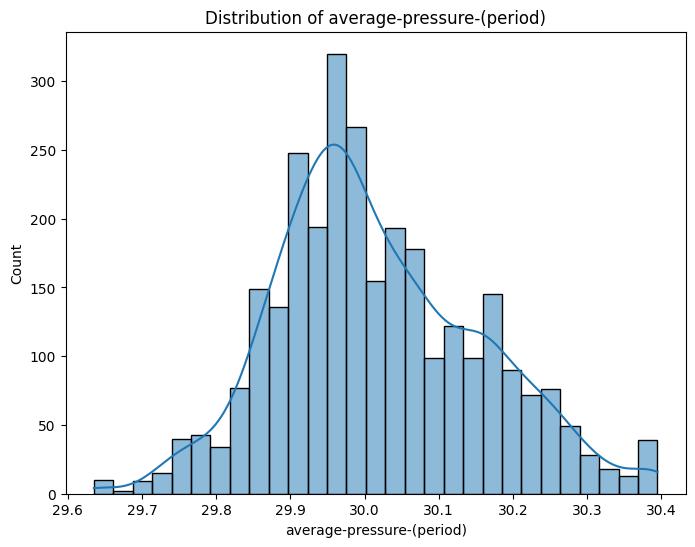

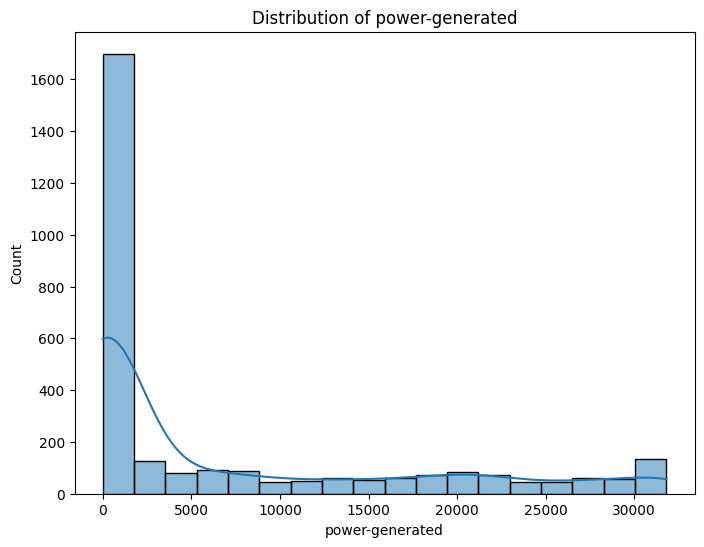

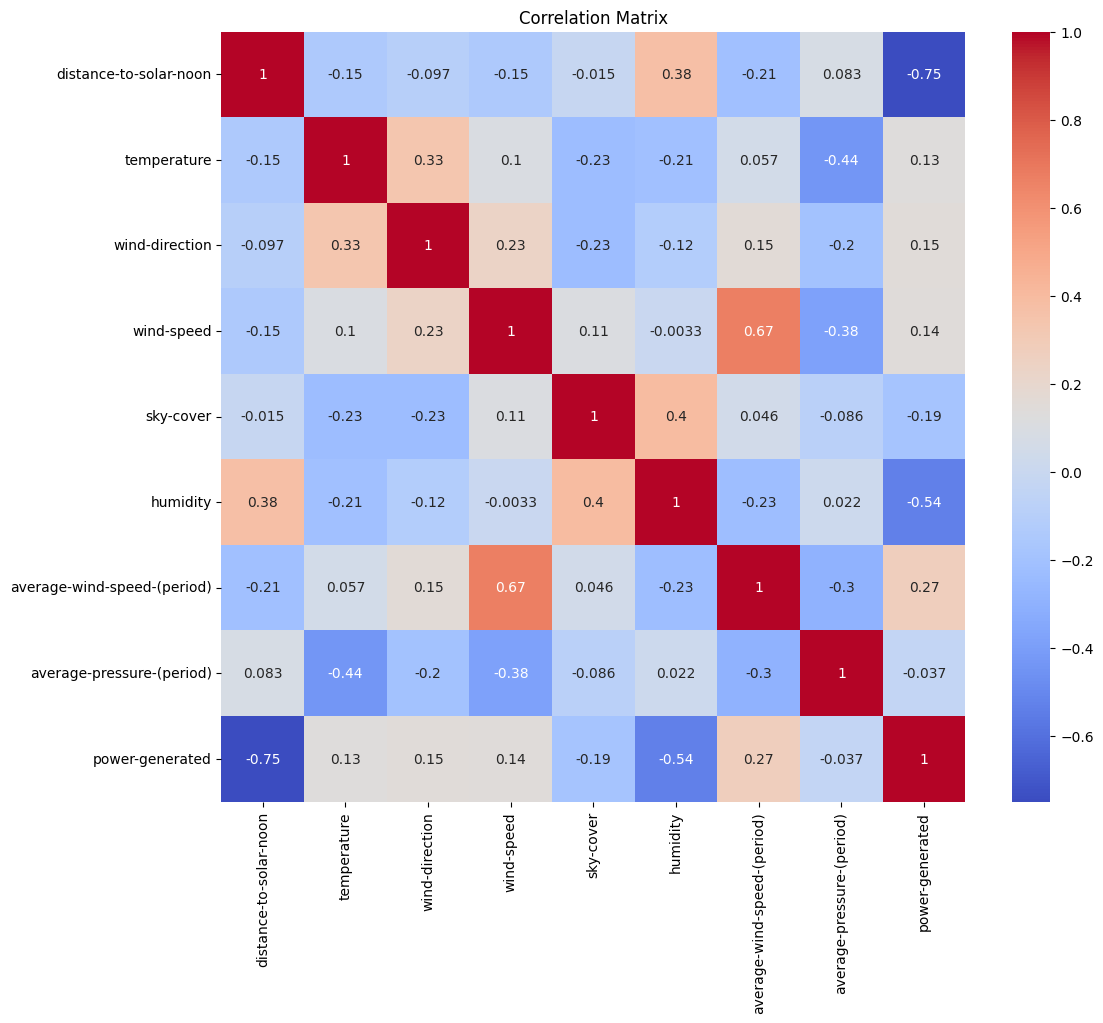

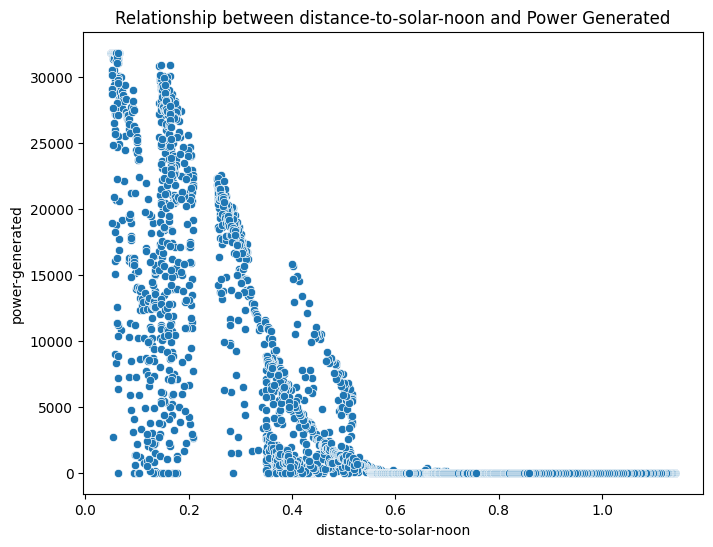

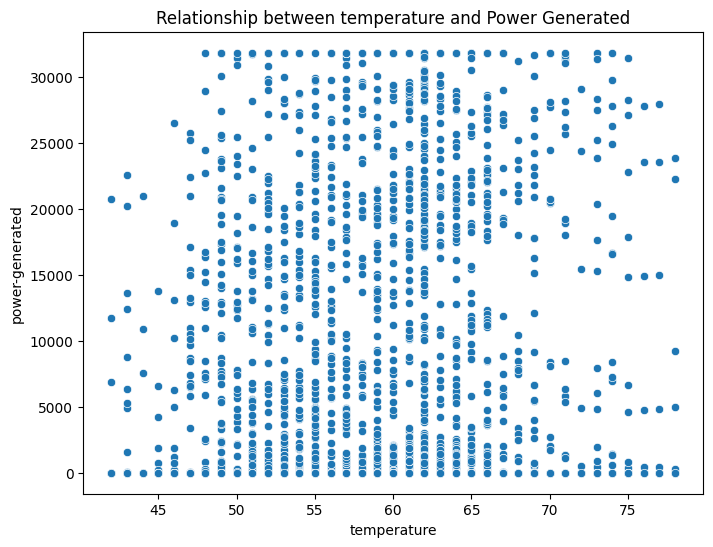

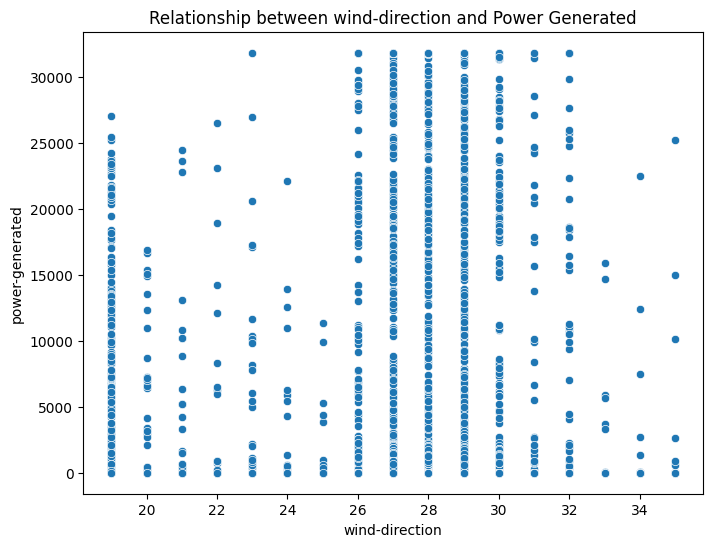

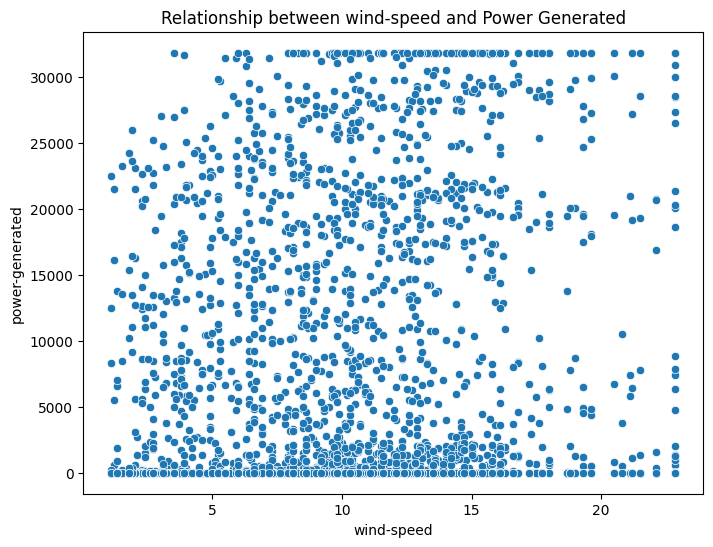

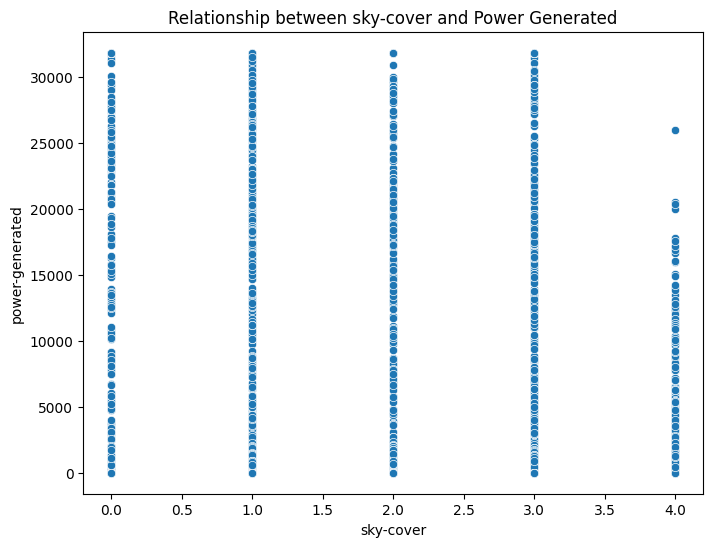

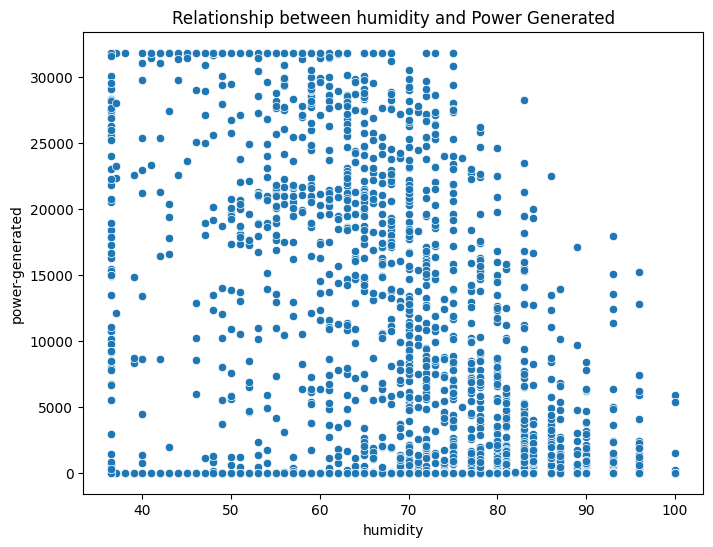

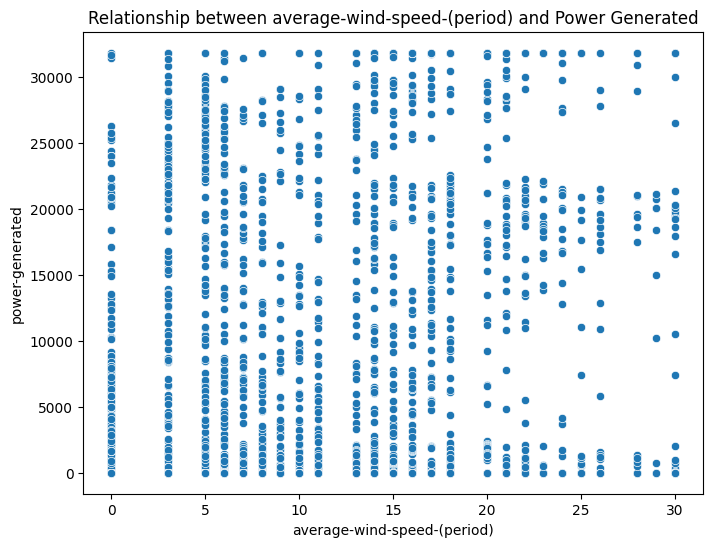

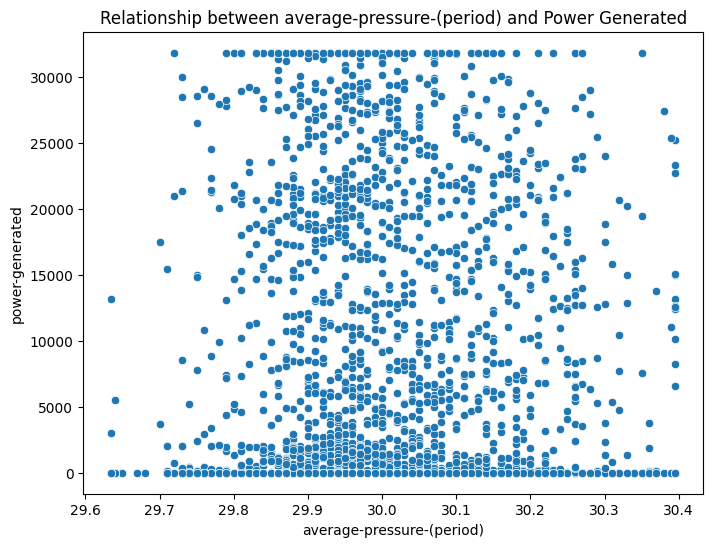

In [30]:
# Check data distribution after outlier treatment
for col in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# Correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore relationships between features and target variable ('power-generated')
for col in df.columns[:-1]:  # Exclude the target variable itself
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='power-generated', data=df)
    plt.title(f'Relationship between {col} and Power Generated')
    plt.show()


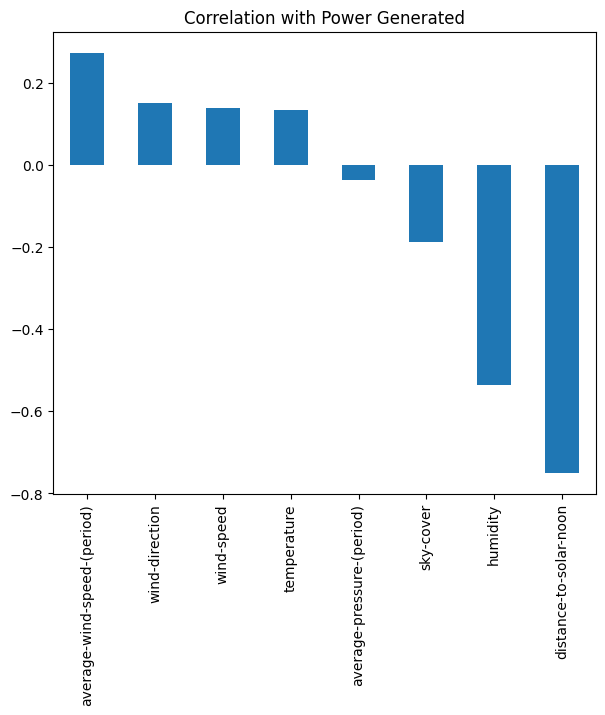

In [31]:
plt.figure(figsize=(7,6))
df.corr()['power-generated'].sort_values(ascending=False).drop('power-generated').plot(kind='bar')
plt.title('Correlation with Power Generated')
plt.show()

In [32]:
# there is one categorical column 'sky-cover' changing it into dummies(one-hot encoding)
solar_df=pd.get_dummies(df,columns=['sky-cover'],dtype=int)
solar_df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),power-generated,sky-cover_0,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4
0,0.859897,69,28,7.5,75.0,8.0,29.82,0.0,1,0,0,0,0
1,0.628535,69,28,7.5,77.0,5.0,29.85,0.0,1,0,0,0,0
2,0.397172,69,28,7.5,70.0,0.0,29.89,5418.0,1,0,0,0,0
3,0.165810,69,28,7.5,36.5,0.0,29.91,25477.0,1,0,0,0,0
4,0.065553,69,28,7.5,36.5,3.0,29.89,30069.0,1,0,0,0,0


##**SCALING THE DATA**

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Removed extra indentation
data_scaled = scaler.fit_transform(solar_df)

In [34]:
data_scaled

array([[ 1.19676525,  1.53968751,  0.42685627, ..., -0.4257109 ,
        -0.49785866, -0.50748065],
       [ 0.4203095 ,  1.53968751,  0.42685627, ..., -0.4257109 ,
        -0.49785866, -0.50748065],
       [-0.35614625,  1.53968751,  0.42685627, ..., -0.4257109 ,
        -0.49785866, -0.50748065],
       ...,
       [-0.70073508,  0.66249821,  0.1822683 , ...,  2.34901195,
        -0.49785866, -0.50748065],
       [ 0.07273813,  0.66249821,  0.1822683 , ...,  2.34901195,
        -0.49785866, -0.50748065],
       [ 0.84621133,  0.66249821,  0.1822683 , ..., -0.4257109 ,
        -0.49785866, -0.50748065]])

## **FEATURE SELECTION**

In [35]:
# use random forest regressor to identify the most important features that affect target variables
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Convert data_scaled back to a DataFrame with original column names
# Assume solar_df is your original DataFrame before scaling
data_scaled = pd.DataFrame(data_scaled, columns=solar_df.columns)

# Assume df is your dataset and 'target' is the label column
X = data_scaled.drop(columns=['power-generated'])
y = data_scaled['power-generated']

# Train a Random Forest Classifier
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Display top features
print(feature_importance)

distance-to-solar-noon         0.834463
sky-cover_4                    0.064752
humidity                       0.022809
wind-speed                     0.016321
wind-direction                 0.016187
temperature                    0.011871
average-pressure-(period)      0.011801
average-wind-speed-(period)    0.010247
sky-cover_3                    0.009249
sky-cover_2                    0.000890
sky-cover_1                    0.000889
sky-cover_0                    0.000521
dtype: float64


In [36]:
data_scaled=data_scaled.drop(['average-wind-speed-(period)','average-pressure-(period)','sky-cover_3','sky-cover_2','sky-cover_1','sky-cover_0'],axis=1)
data_scaled.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,humidity,power-generated,sky-cover_4
0,1.196765,1.539688,0.426856,-0.539694,0.087755,-0.682035,-0.507481
1,0.420310,1.539688,0.426856,-0.539694,0.226321,-0.682035,-0.507481
2,-0.356146,1.539688,0.426856,-0.539694,-0.258662,-0.147240,-0.507481
3,-1.132602,1.539688,0.426856,-0.539694,-2.579652,1.832724,-0.507481
4,-1.469066,1.539688,0.426856,-0.539694,-2.579652,2.285987,-0.507481


In [37]:
# Convert data_scaled back to a DataFrame with original column names
# Assume solar_df is your original DataFrame before scaling
data_scaled = pd.DataFrame(data_scaled, columns=data_scaled.columns)

In [38]:
# here we change the column names
solar_df = data_scaled.rename(columns={
    'distance-to-solar-noon': 'distance_to_solar_noon',
    'temperature': 'temperature',
    'wind-direction': 'wind_direction',
    'wind-speed': 'wind_speed',
    'sky-cover_0': 'sky_cover_0',
    'sky-cover_1': 'sky_cover_1',
    'sky-cover_2': 'sky_cover_2',
    'sky-cover_3': 'sky_cover_3',
    'sky-cover_4': 'sky_cover_4',
    'humidity': 'humidity',
    'average-wind-speed-(period)': 'average_wind_speed',
    'average-pressure-(period)': 'average_pressure',
    'power-generated': 'power_generated'
})

##**SPLITTING THE DATA INTO TRAINING AND TESTING SETS**

In [40]:
from sklearn.model_selection import train_test_split
X=solar_df.drop('power_generated',axis=1)
y=solar_df['power_generated']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
X

,distance_to_solar_noon,temperature,wind_direction,wind_speed,humidity,sky_cover_4
0,1.196765,1.539688,0.426856,-0.539694,0.087755,-0.507481
1,0.420310,1.539688,0.426856,-0.539694,0.226321,-0.507481
2,-0.356146,1.539688,0.426856,-0.539694,-0.258662,-0.507481
3,-1.132602,1.539688,0.426856,-0.539694,-2.579652,-0.507481
4,-1.469066,1.539688,0.426856,-0.539694,-2.579652,-0.507481
...,...,...,...,...,...,...
2915,-1.130442,0.662498,0.182268,0.802574,0.087755,1.970518
2916,-1.474208,0.662498,0.182268,0.802574,-0.535795,-0.507481
2917,-0.700735,0.662498,0.182268,0.802574,-0.397228,-0.507481
2918,0.072738,0.662498,0.182268,0.802574,0.503455,-0.507481


# **MODEL BUILDING AND EVALUATION**

##**1.Build the Linear Regression Model**

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

###**Applying the model to make a prediction**


In [42]:

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

###**Evaluate model performance**

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.33836149977065433
LR R2 (Train):  0.6623927915830197
LR MSE (Test):  0.366877433548243
LR R2 (Test):  0.6297747702978547


In [42]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [43]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.338361,0.662393,0.366877,0.629775


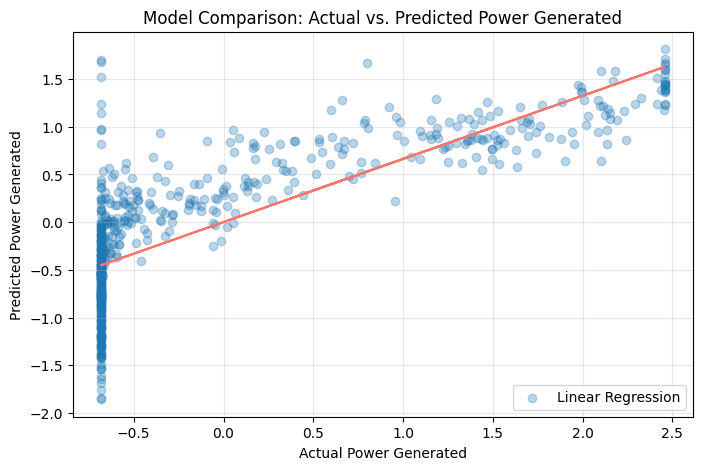

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_lr_test_pred, label='Linear Regression', alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## **2.Build the Ridge Model**

In [44]:
from sklearn.linear_model import Ridge,Lasso

ri= Ridge(alpha=0.5)

ri.fit(X_train, y_train)

Ridge(alpha=0.5)

###**Applying the model to make a prediction**

In [45]:
y_ri_train_pred = ri.predict(X_train)
y_ri_test_pred = ri.predict(X_test)

###**Evaluate model performance**


In [47]:
ri_train_mse = mean_squared_error(y_train, y_ri_train_pred)
ri_train_r2 = r2_score(y_train, y_ri_train_pred)

ri_test_mse = mean_squared_error(y_test, y_ri_test_pred)
ri_test_r2 = r2_score(y_test, y_ri_test_pred)

print('RI MSE (Train): ', ri_train_mse)
print('RI R2 (Train): ', ri_train_r2)
print('RI MSE (Test): ', ri_test_mse)
print('RI R2 (Test): ', ri_test_r2)

RI MSE (Train):  0.3383615196611107
RI R2 (Train):  0.6623927717369039
RI MSE (Test):  0.36687895156191785
RI R2 (Test):  0.6297732384321413


In [48]:
ri_results = pd.DataFrame(['Ridge', ri_train_mse, ri_train_r2, ri_test_mse, ri_test_r2]).transpose()
ri_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [49]:
ri_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Ridge,0.338362,0.662393,0.366879,0.629773


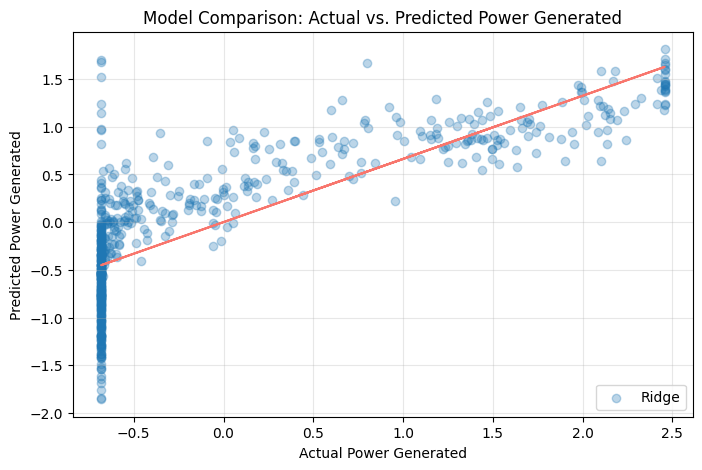

In [50]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_ri_test_pred, label='Ridge', alpha=0.3)
z = np.polyfit(y_train, y_ri_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## **3.Build the Lasso Model**

In [51]:
la= Lasso(alpha=0.5)

la.fit(X_train, y_train)

Lasso(alpha=0.5)

###**Applying the model to make a prediction**

In [52]:
y_la_train_pred = la.predict(X_train)
y_la_test_pred = la.predict(X_test)

### **Evaluate model performance**

In [53]:
la_train_mse = mean_squared_error(y_train, y_la_train_pred)
la_train_r2 = r2_score(y_train, y_la_train_pred)

la_test_mse = mean_squared_error(y_test, y_la_test_pred)
la_test_r2 = r2_score(y_test, y_la_test_pred)

print('LA MSE (Train): ', la_train_mse)
print('LA R2 (Train): ', la_train_r2)
print('LA MSE (Test): ', la_test_mse)
print('LA R2 (Test): ', la_test_r2)

LA MSE (Train):  0.6865630624352708
LA R2 (Train):  0.31496745620262934
LA MSE (Test):  0.6847334738026327
LA R2 (Test):  0.30901825939100014


In [54]:
la_results = pd.DataFrame(['Lasso', la_train_mse, la_train_r2, la_test_mse, la_test_r2]).transpose()
la_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [55]:
la_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Lasso,0.686563,0.314967,0.684733,0.309018


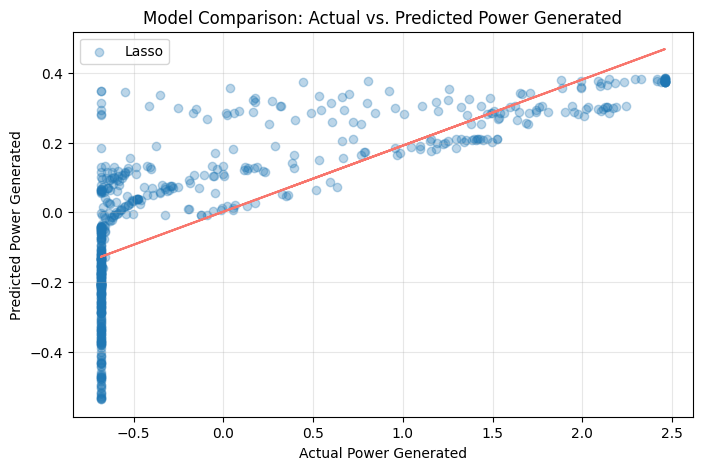

In [56]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_la_test_pred, label='Lasso', alpha=0.3)
z = np.polyfit(y_train, y_la_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

##**4.Build the SVM Model**

In [57]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

SVR()

###**Applying the model to make a prediction**

In [58]:
y_svm_train_pred = svm.predict(X_train)
y_svm_test_pred = svm.predict(X_test)

### **Evaluate model performance**

In [59]:
svm_train_mse = mean_squared_error(y_train, y_svm_train_pred)
svm_train_r2 = r2_score(y_train, y_svm_train_pred)

svm_test_mse = mean_squared_error(y_test, y_svm_test_pred)
svm_test_r2 = r2_score(y_test, y_svm_test_pred)

print('SVM MSE (Train): ', svm_train_mse)
print('SVM R2 (Train): ', svm_train_r2)
print('SVM MSE (Test): ', svm_test_mse)
print('SVM R2 (Test): ', svm_test_r2)

SVM MSE (Train):  0.10241869202281961
SVM R2 (Train):  0.8978096245377222
SVM MSE (Test):  0.13589803789301816
SVM R2 (Test):  0.8628618778527365


In [60]:
svm_results = pd.DataFrame(['SVM', svm_train_mse, svm_train_r2, svm_test_mse, svm_test_r2]).transpose()
svm_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
svm_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,SVM,0.102419,0.89781,0.135898,0.862862


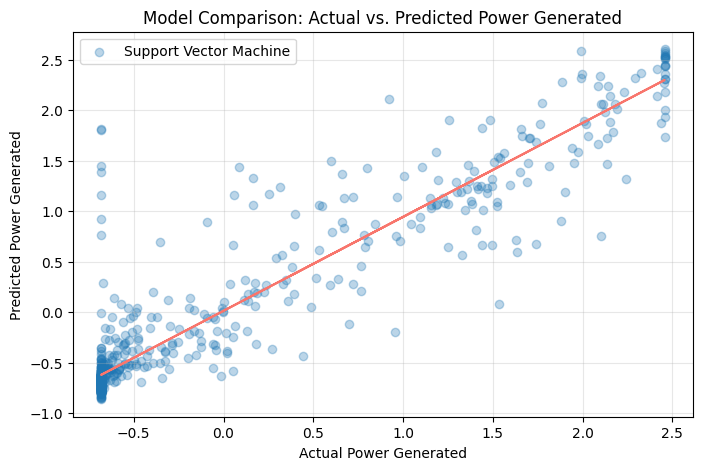

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_svm_test_pred, label='Support Vector Machine', alpha=0.3)
z = np.polyfit(y_train, y_svm_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the SVM Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly'] # Kernel type
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_svm = grid_search.best_estimator_

# Evaluate the best model
y_svm_train_pred = best_svm.predict(X_train)
y_svm_test_pred = best_svm.predict(X_test)

svm_train_mse = mean_squared_error(y_train, y_svm_train_pred)
svm_train_r2 = r2_score(y_train, y_svm_train_pred)

svm_test_mse = mean_squared_error(y_test, y_svm_test_pred)
svm_test_r2 = r2_score(y_test, y_svm_test_pred)

print('SVM MSE (Train): ', svm_train_mse)
print('SVM R2 (Train): ', svm_train_r2)
print('SVM MSE (Test): ', svm_test_mse)
print('SVM R2 (Test): ', svm_test_r2)

svm_results = pd.DataFrame(['SVM', svm_train_mse, svm_train_r2, svm_test_mse, svm_test_r2]).transpose()
svm_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
svm_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_svm_test_pred, label='Support Vector Machine', alpha=0.3)
z = np.polyfit(y_train, y_svm_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## **5.Build the KNN Model**

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=30,weights='uniform',metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=30)

### **Applying the model to make a prediction**

In [49]:
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)

### **Evaluate model performance**

In [50]:
knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)

knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)

print('KNN MSE (Train): ', knn_train_mse)
print('KNN R2 (Train): ', knn_train_r2)
print('KNN MSE (Test): ', knn_test_mse)
print('KNN R2 (Test): ', knn_test_r2)


KNN MSE (Train):  0.12599059244754576
KNN R2 (Train):  0.8742902717009813
KNN MSE (Test):  0.16016945001604607
KNN R2 (Test):  0.8383689864760805


In [ ]:
knn_results = pd.DataFrame(['KNN', knn_train_mse, knn_train_r2, knn_test_mse, knn_test_r2]).transpose()
knn_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
knn_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_knn_test_pred, label='K-Nearest Neighbor', alpha=0.3)
z = np.polyfit(y_train, y_knn_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the KNN Model**

In [ ]:
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model
y_knn_train_pred = best_knn.predict(X_train)
y_knn_test_pred = best_knn.predict(X_test)

knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)

knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)

print('KNN MSE (Train): ', knn_train_mse)
print('KNN R2 (Train): ', knn_train_r2)
print('KNN MSE (Test): ', knn_test_mse)
print('KNN R2 (Test): ', knn_test_r2)

knn_results = pd.DataFrame(['KNN', knn_train_mse, knn_train_r2, knn_test_mse, knn_test_r2]).transpose()
knn_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
knn_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_knn_test_pred, label='K-Nearest Neighbor', alpha=0.3)
z = np.polyfit(y_train, y_knn_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

##**6.Build the Decision Tree Model**

In [51]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5,random_state=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=100)

### **Applying the model to make a prediction**

In [52]:
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

### **Evaluate model performance**

In [53]:
dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)

print('DT MSE (Train): ', dt_train_mse)
print('DT R2 (Train): ', dt_train_r2)
print('DT MSE (Test): ', dt_test_mse)
print('DT R2 (Test): ', dt_test_r2)

DT MSE (Train):  0.09365769196675387
DT R2 (Train):  0.9065510941608153
DT MSE (Test):  0.13959273901673946
DT R2 (Test):  0.8591334621827369


In [ ]:
dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()
dt_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
dt_results


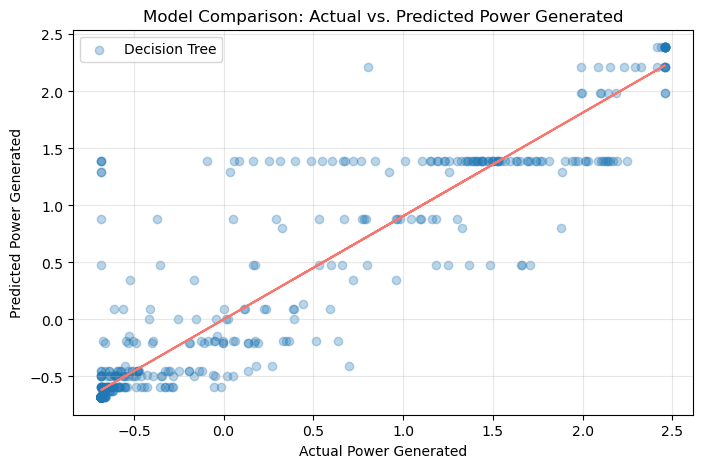

In [75]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_dt_test_pred, label='Decision Tree', alpha=0.3)
z = np.polyfit(y_train, y_dt_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the Decision Tree Model**

In [76]:
# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt = grid_search.best_estimator_

# Evaluate the best model
y_dt_train_pred = best_dt.predict(X_train)
y_dt_test_pred = best_dt.predict(X_test)

dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)

print('DT MSE (Train): ', dt_train_mse)
print('DT R2 (Train): ', dt_train_r2)
print('DT MSE (Test): ', dt_test_mse)
print('DT R2 (Test): ', dt_test_r2)

dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()
dt_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
dt_results

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
DT MSE (Train):  0.09365801162678147
DT R2 (Train):  0.9065507752133888
DT MSE (Test):  0.13959273901673944
DT R2 (Test):  0.859133462182737


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Decision Tree,0.093658,0.906551,0.139593,0.859133


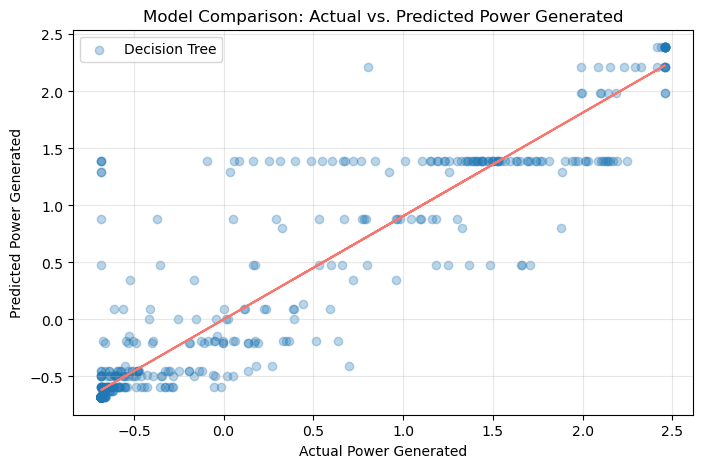

In [77]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_dt_test_pred, label='Decision Tree', alpha=0.3)
z = np.polyfit(y_train, y_dt_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

##**7.Build the GradientBoosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200,max_depth=1)
gb.fit(X_train, y_train)

### **Applying the model to make a prediction**

In [ ]:
y_gb_train_pred = gb.predict(X_train)
y_gb_test_pred = gb.predict(X_test)

### **Evaluate model performance**

In [ ]:
gb_train_mse = mean_squared_error(y_train, y_gb_train_pred)
gb_train_r2 = r2_score(y_train, y_gb_train_pred)

gb_test_mse = mean_squared_error(y_test, y_gb_test_pred)
gb_test_r2 = r2_score(y_test, y_gb_test_pred)

print('GB MSE (Train): ', gb_train_mse)
print('GB R2 (Train): ', gb_train_r2)
print('GBB MSE (Test): ', gb_test_mse)
print('GB R2 (Test): ', gb_test_r2)

In [ ]:
gb_results = pd.DataFrame(['Gradient Boosting', gb_train_mse, gb_train_r2, gb_test_mse, gb_test_r2]).transpose()
gb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
gb_results

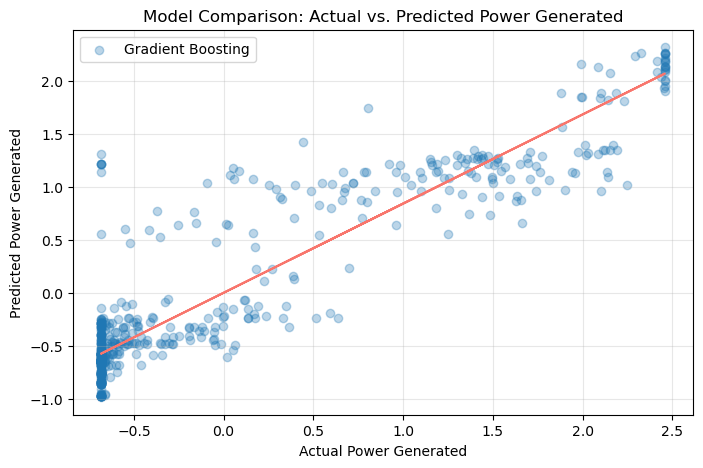

In [82]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_gb_test_pred, label='Gradient Boosting', alpha=0.3)
z = np.polyfit(y_train, y_gb_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the Gradient Boosting Model**

In [83]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_gb = grid_search.best_estimator_

# Evaluate the best model
y_gb_train_pred = best_gb.predict(X_train)
y_gb_test_pred = best_gb.predict(X_test)

gb_train_mse = mean_squared_error(y_train, y_gb_train_pred)
gb_train_r2 = r2_score(y_train, y_gb_train_pred)

gb_test_mse = mean_squared_error(y_test, y_gb_test_pred)
gb_test_r2 = r2_score(y_test, y_gb_test_pred)

print('GB MSE (Train): ', gb_train_mse)
print('GB R2 (Train): ', gb_train_r2)
print('GB MSE (Test): ', gb_test_mse)
print('GB R2 (Test): ', gb_test_r2)

gb_results = pd.DataFrame(['Gradient Boosting', gb_train_mse, gb_train_r2, gb_test_mse, gb_test_r2]).transpose()
gb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
gb_results

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
GB MSE (Train):  0.06391171503647393
GB R2 (Train):  0.9362307599616662
GB MSE (Test):  0.11194722100046696
GB R2 (Test):  0.8870312485328571


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Gradient Boosting,0.063912,0.936231,0.111947,0.887031


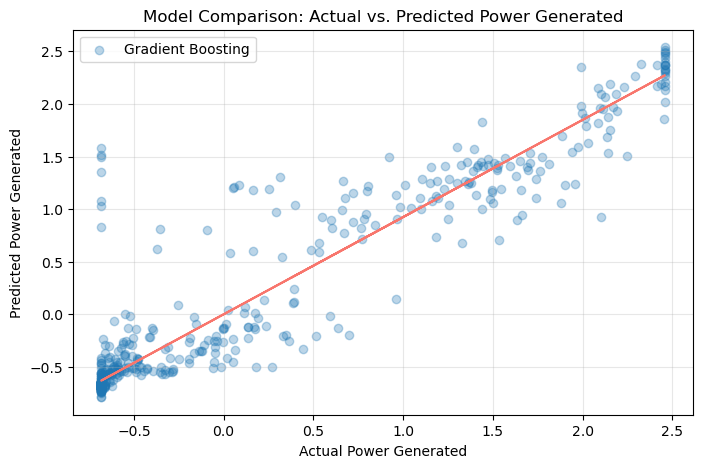

In [84]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_gb_test_pred, label='Gradient Boosting', alpha=0.3)
z = np.polyfit(y_train, y_gb_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## **8.Build the XGBoost Model**

In [1]:

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train) 

NameError: name 'X_train' is not defined

### **Applying the model to make a prediction**

In [86]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_test_pred = xgb.predict(X_test)

### **Evaluate model performance**

In [87]:
xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)

print('XGB MSE (Train): ', xgb_train_mse)
print('XGB R2 (Train): ', xgb_train_r2)
print('XGB MSE (Test): ', xgb_test_mse)
print('XGB R2 (Test): ', xgb_test_r2)

XGB MSE (Train):  0.0020540979733901766
XGB R2 (Train):  0.9979504811183267
XGB MSE (Test):  0.1081742282736471
XGB R2 (Test):  0.8908386702252783


In [88]:
xgb_results = pd.DataFrame(['XGBoost', xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]).transpose()
xgb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
xgb_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBoost,0.002054,0.99795,0.108174,0.890839


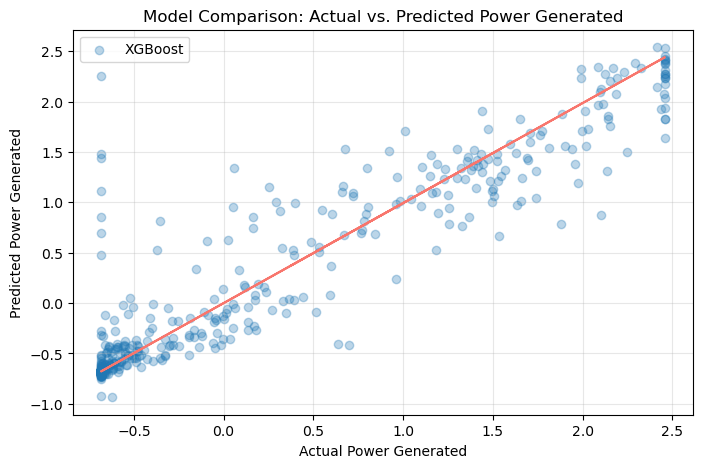

In [89]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_xgb_test_pred, label='XGBoost', alpha=0.3)
z = np.polyfit(y_train, y_xgb_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the XGBoost Model**

In [90]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0], # Fraction of features used for fitting the trees
    'reg_alpha': [0, 0.1, 1], # L1 regularization term
    'reg_lambda': [0, 0.1, 1] # L2 regularization term
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb = grid_search.best_estimator_

# Evaluate the best model
y_xgb_train_pred = best_xgb.predict(X_train)
y_xgb_test_pred = best_xgb.predict(X_test)

xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)

print('XGB MSE (Train): ', xgb_train_mse)
print('XGB R2 (Train): ', xgb_train_r2)
print('XGB MSE (Test): ', xgb_test_mse)
print('XGB R2 (Test): ', xgb_test_r2)

xgb_results = pd.DataFrame(['XGBoost', xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]).transpose()
xgb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
xgb_results

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.9}
XGB MSE (Train):  0.050782328131768126
XGB R2 (Train):  0.9493308782201815
XGB MSE (Test):  0.1082252546376793
XGB R2 (Test):  0.8907871782401704


,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBoost,0.050782,0.949331,0.108225,0.890787


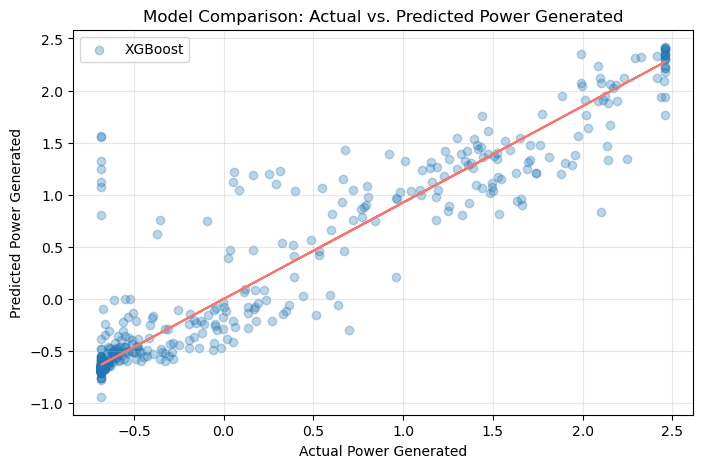

In [91]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_xgb_test_pred, label='XGBoost', alpha=0.3)
z = np.polyfit(y_train, y_xgb_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## **9.Build the random Forest Model**

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4,random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=100)

### **Applying the model to make a prediction**

In [93]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [94]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

RF MSE (Train):  0.10689539875853232
RF R2 (Train):  0.893342897487009
RF MSE (Test):  0.1400518904675137
RF R2 (Test):  0.8586701209254486


In [95]:
rf_results= pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.106895,0.893343,0.140052,0.85867


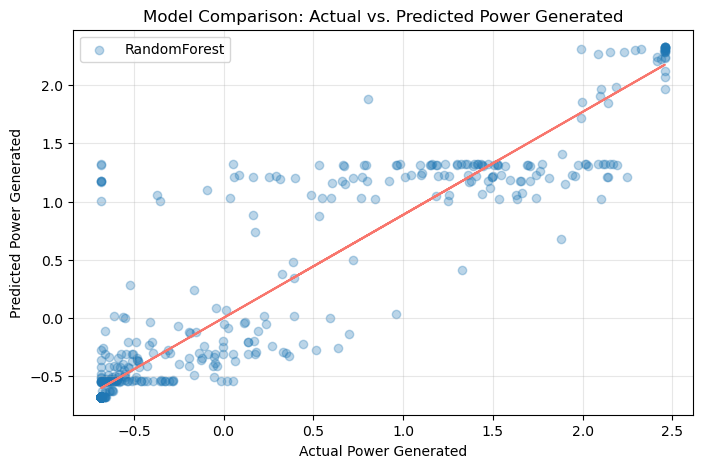

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_rf_test_pred, label='RandomForest', alpha=0.3)
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the RandomForest Model**

In [97]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=100)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_rf_train_pred = best_rf.predict(X_train)
y_rf_test_pred = best_rf.predict(X_test)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score: -0.09655323065607559
RF MSE (Train):  0.04256994606646278
RF R2 (Train):  0.9575249528575166
RF MSE (Test):  0.12031151402133537
RF R2 (Test):  0.8785906304359693


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.04257,0.957525,0.120312,0.878591


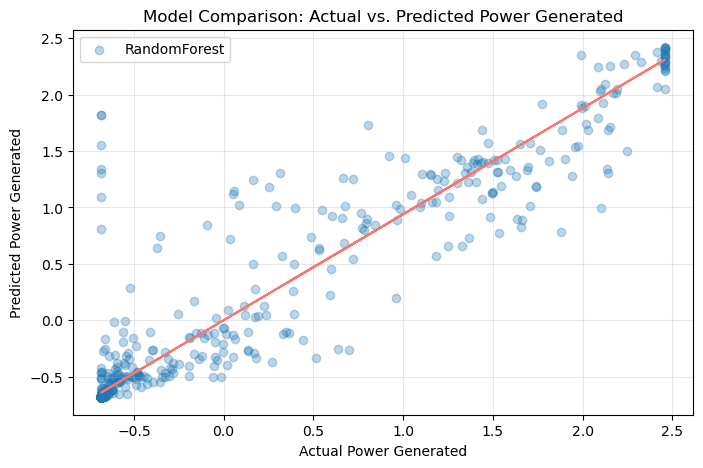

In [98]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_rf_test_pred, label='RandomForest', alpha=0.3)
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

##**10.Build the ANN model**

In [99]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
ann.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### **Applying the model to make a prediction**

In [100]:
y_ann_train_pred = ann.predict(X_train)
y_ann_test_pred = ann.predict(X_test)

### **Evaluate model performance**

In [101]:
ann_train_mse = mean_squared_error(y_train, y_ann_train_pred)
ann_train_r2 = r2_score(y_train, y_ann_train_pred)
ann_test_mse = mean_squared_error(y_test, y_ann_test_pred)
ann_test_r2 = r2_score(y_test, y_ann_test_pred)

print('ANN MSE (Train):', ann_train_mse)
print('ANN R2 (Train):', ann_train_r2)
print('ANN MSE (Test):', ann_test_mse)
print('ANN R2 (Test):', ann_test_r2)

ANN MSE (Train): 0.07749405634044951
ANN R2 (Train): 0.9226786970511105
ANN MSE (Test): 0.13212557375014528
ANN R2 (Test): 0.8666687661378252


In [102]:
ann_results = pd.DataFrame(['ANN', ann_train_mse, ann_train_r2, ann_test_mse, ann_test_r2]).transpose()
ann_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
ann_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,ANN,0.077494,0.922679,0.132126,0.866669


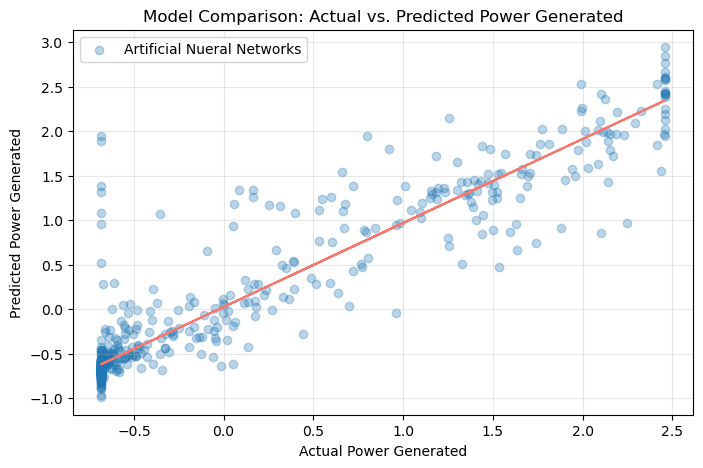

In [103]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_ann_test_pred, label='Artificial Nueral Networks', alpha=0.3)
z = np.polyfit(y_train, y_ann_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **Tuning the ANN Model**

In [104]:
# Define the parameter grid for ANN
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function for hidden layers
    'solver': ['adam', 'sgd'],  # Weight optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization term
    'learning_rate': ['constant', 'adaptive'], # Learning rate schedule
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ann, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_ann = grid_search.best_estimator_

# Evaluate the best model
y_ann_train_pred = best_ann.predict(X_train)
y_ann_test_pred = best_ann.predict(X_test)

ann_train_mse = mean_squared_error(y_train, y_ann_train_pred)
ann_train_r2 = r2_score(y_train, y_ann_train_pred)
ann_test_mse = mean_squared_error(y_test, y_ann_test_pred)
ann_test_r2 = r2_score(y_test, y_ann_test_pred)

print('ANN MSE (Train):', ann_train_mse)
print('ANN R2 (Train):', ann_train_r2)
print('ANN MSE (Test):', ann_test_mse)
print('ANN R2 (Test):', ann_test_r2)

ann_results = pd.DataFrame(['ANN', ann_train_mse, ann_train_r2, ann_test_mse, ann_test_r2]).transpose()
ann_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
ann_results

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}
ANN MSE (Train): 0.09683853412591252
ANN R2 (Train): 0.903377342884454
ANN MSE (Test): 0.13157865501655439
ANN R2 (Test): 0.8672206755638528


,Method,Training MSE,Training R2,Test MSE,Test R2
0,ANN,0.096839,0.903377,0.131579,0.867221


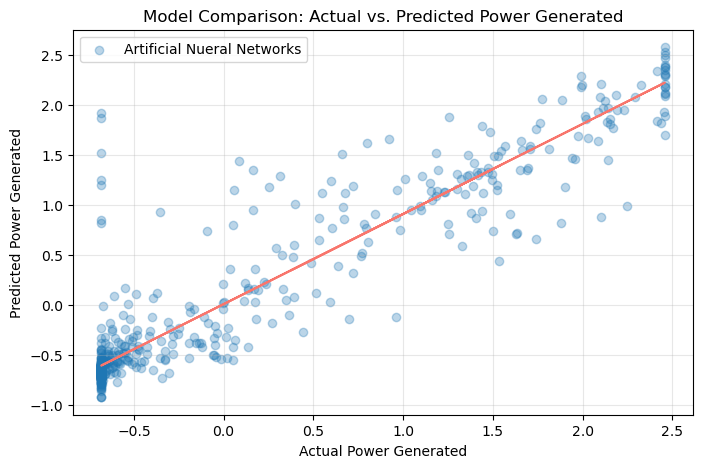

In [105]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_ann_test_pred, label='Artificial Nueral Networks', alpha=0.3)
z = np.polyfit(y_train, y_ann_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train),'#F8766D')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Model Comparison: Actual vs. Predicted Power Generated')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# **MODEL COMPARISON**

In [106]:
df_models=pd.concat([lr_results,ri_results,la_results,svm_results,knn_results,dt_results,gb_results,xgb_results,rf_results,ann_results],axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.338361,0.662393,0.366877,0.629775
1,Ridge,0.338362,0.662393,0.366879,0.629773
2,Lasso,0.686563,0.314967,0.684733,0.309018
3,SVM,0.099511,0.900711,0.135143,0.863624
4,KNN,0.0,1.0,0.124353,0.874512
5,Decision Tree,0.093658,0.906551,0.139593,0.859133
6,Gradient Boosting,0.063912,0.936231,0.111947,0.887031
7,XGBoost,0.050782,0.949331,0.108225,0.890787
8,Random Forest,0.04257,0.957525,0.120312,0.878591
9,ANN,0.096839,0.903377,0.131579,0.867221


In [54]:
import pickle
with open("model1.pkl","wb") as model1:
    pickle.dump(dt,model1)
    print("model dumped successfully")

model dumped successfully


NameError: name 'x' is not defined

In [57]:
y_test

2437    1.470173
2470   -0.478205
2359   -0.682035
789    -0.123945
1642   -0.324617
          ...   
2880   -0.682035
2295   -0.682035
2222   -0.511173
1090   -0.680554
542    -0.682035
Name: power_generated, Length: 584, dtype: float64